In [1]:
import ROOT
ROOT.gSystem.Load("RooUnfold/libRooUnfold")
ROOT.gStyle.SetOptStat(000000)



Welcome to JupyROOT 6.10/04


In [2]:
pdffile = ROOT.TFile('qcdmc_pythiaflat_pdf4lhc15_2dplots.root')

lumi = 2300.

In [3]:

pdfnom_response = pdffile.Get('2d_response')
pdfup_response = pdffile.Get('2d_response_pdfup')
pdfdn_response = pdffile.Get('2d_response_pdfdn')
pdf_reco = pdffile.Get('PFJet_pt_m_AK8')
pdf_reco.Scale(1.0 / lumi)

unfold_nom = ROOT.RooUnfoldBayes(pdfnom_response, pdf_reco, 4)
unfold_nom.SetName("unfold_nom")
unfolded_nom = unfold_nom.Hreco().Clone("2d_response_nom_mc")

unfold_pdfup = ROOT.RooUnfoldBayes(pdfup_response, pdf_reco, 4)
unfold_pdfup.SetName("unfold_pdfup")
unfolded_pdfup = unfold_pdfup.Hreco().Clone("2d_response_pdfup_mc")

unfold_pdfdn = ROOT.RooUnfoldBayes(pdfdn_response, pdf_reco, 4)
unfold_pdfdn.SetName("unfold_pdfdn")
unfolded_pdfdn = unfold_pdfdn.Hreco().Clone("2d_response_pdfdn_mc")




Add truth bin for 2.82144 fakes
Now unfolding...
Iteration : 0
Chi^2 of change 9.25843e-11
Iteration : 1
Chi^2 of change 1.63533e-11
Iteration : 2
Chi^2 of change 3.77967e-12
Iteration : 3
Chi^2 of change 1.07907e-12
Calculating covariances due to number of measured events
Add truth bin for 2.93597 fakes
Now unfolding...
Iteration : 0
Chi^2 of change 2.01333e-10
Iteration : 1
Chi^2 of change 3.84478e-11
Iteration : 2
Chi^2 of change 9.94224e-12
Iteration : 3
Chi^2 of change 3.44592e-12
Calculating covariances due to number of measured events
Add truth bin for 2.70491 fakes
Now unfolding...
Iteration : 0
Chi^2 of change 1.45302e-10
Iteration : 1
Chi^2 of change 2.40989e-11
Iteration : 2
Chi^2 of change 5.16802e-12
Iteration : 3
Chi^2 of change 1.53797e-12
Calculating covariances due to number of measured events


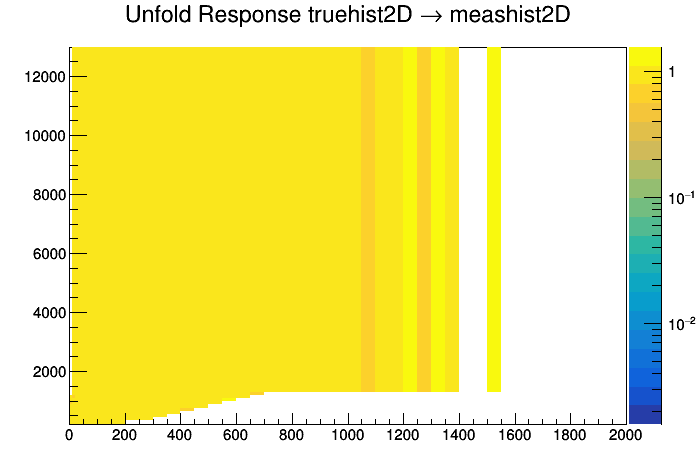

In [4]:



ratio = unfolded_pdfup.Clone("ratio")
#ratio.Add( unfolded_nom, -1.0 )
ratio.Divide(unfolded_nom)

c = ROOT.TCanvas("c", "c")
ratio.Draw("colz")

c.SetLogz()
c.Draw()

In [5]:
def printit( ratio ):
    for ibin in xrange(ratio.GetNbinsX()):
        print '%5.0f' % ( ratio.GetXaxis().GetBinLowEdge(ibin)),
        for jbin in xrange(ratio.GetNbinsY()):
            print '%5.2e' % ( abs(ratio.GetBinContent(ibin,jbin))),
        print ''
    return


printit(ratio)

  -43 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 
    0 0.00e+00 0.00e+00 9.45e-01 9.91e-01 1.02e+00 1.00e+00 0.00e+00 0.00e+00 1.02e+00 0.00e+00 0.00e+00 0.00e+00 
    1 0.00e+00 1.00e+00 1.01e+00 9.87e-01 1.02e+00 1.02e+00 0.00e+00 1.09e+00 0.00e+00 0.00e+00 0.00e+00 1.03e+00 
    5 0.00e+00 9.83e-01 9.81e-01 1.00e+00 9.40e-01 9.33e-01 1.03e+00 8.62e-01 7.63e-01 1.04e+00 1.06e+00 0.00e+00 
   10 0.00e+00 9.78e-01 9.79e-01 9.86e-01 9.82e-01 9.93e-01 9.83e-01 9.37e-01 9.99e-01 1.00e+00 6.44e-01 1.01e+00 
   20 0.00e+00 9.77e-01 9.81e-01 9.88e-01 9.86e-01 9.82e-01 9.81e-01 9.81e-01 9.68e-01 9.80e-01 1.00e+00 9.90e-01 
   40 0.00e+00 9.77e-01 9.77e-01 9.90e-01 9.90e-01 9.88e-01 9.87e-01 9.86e-01 9.82e-01 9.85e-01 9.88e-01 9.82e-01 
   60 0.00e+00 9.78e-01 9.72e-01 9.93e-01 9.96e-01 9.95e-01 9.93e-01 9.90e-01 9.88e-01 9.88e-01 9.88e-01 9.89e-01 
   80 0.00e+00 9.82e-01 9.79e-01 9.94e-01 9.99e-01 1.00e+00 1.00e+00 9.99e-01 9.

  -43 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 
    0 0.00e+00 0.00e+00 3.97e-10 4.00e-10 7.33e-11 8.54e-12 0.00e+00 2.27e-12 1.62e-11 0.00e+00 0.00e+00 0.00e+00 
    1 0.00e+00 3.58e-08 1.76e-08 9.31e-10 2.99e-10 5.71e-11 0.00e+00 2.30e-11 0.00e+00 0.00e+00 0.00e+00 1.55e-12 
    5 0.00e+00 1.68e-06 2.26e-07 1.97e-08 1.65e-09 6.36e-10 1.00e-10 1.95e-11 1.30e-11 6.41e-12 3.12e-13 0.00e+00 
   10 0.00e+00 8.98e-05 1.27e-05 1.22e-06 1.12e-07 2.49e-08 5.43e-09 1.47e-09 2.65e-10 1.42e-10 1.90e-11 1.39e-11 
   20 0.00e+00 1.42e-03 2.65e-04 3.32e-05 3.89e-06 9.87e-07 2.62e-07 7.67e-08 1.44e-08 5.50e-09 2.13e-09 8.63e-10 
   40 0.00e+00 1.77e-03 4.96e-04 8.62e-05 1.25e-05 3.62e-06 1.08e-06 3.53e-07 7.41e-08 2.98e-08 1.26e-08 5.67e-09 
   60 0.00e+00 7.82e-04 3.04e-04 7.54e-05 1.43e-05 4.86e-06 1.64e-06 6.04e-07 1.38e-07 5.97e-08 2.70e-08 1.24e-08 
   80 0.00e+00 2.90e-04 1.52e-04 4.44e-05 9.98e-06 3.82e-06 1.46e-06 6.03e-07 1.

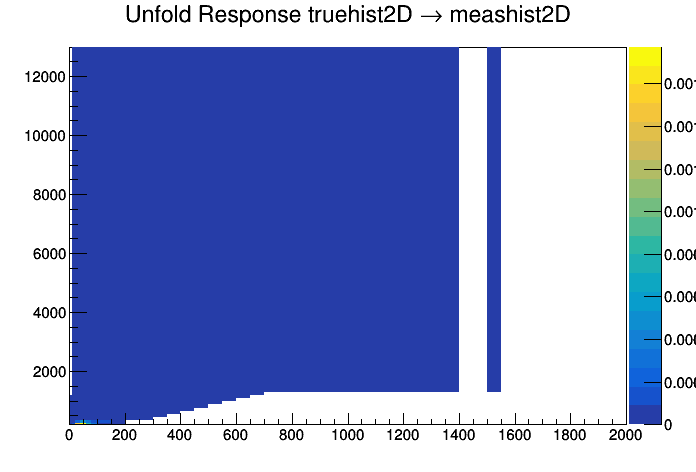

In [6]:
c1 = ROOT.TCanvas("c1", "c1")
unfolded_nom.Draw("colz")
c1.Draw()

printit(unfolded_nom)


  -43 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 
    0 0.00e+00 0.00e+00 3.75e-10 3.96e-10 7.47e-11 8.56e-12 0.00e+00 0.00e+00 1.65e-11 0.00e+00 0.00e+00 0.00e+00 
    1 0.00e+00 3.58e-08 1.77e-08 9.19e-10 3.04e-10 5.83e-11 0.00e+00 2.49e-11 0.00e+00 0.00e+00 0.00e+00 1.61e-12 
    5 0.00e+00 1.65e-06 2.22e-07 1.97e-08 1.55e-09 5.93e-10 1.03e-10 1.68e-11 9.93e-12 6.65e-12 3.31e-13 0.00e+00 
   10 0.00e+00 8.78e-05 1.25e-05 1.21e-06 1.11e-07 2.47e-08 5.33e-09 1.37e-09 2.65e-10 1.42e-10 1.22e-11 1.40e-11 
   20 0.00e+00 1.39e-03 2.60e-04 3.28e-05 3.83e-06 9.70e-07 2.58e-07 7.52e-08 1.39e-08 5.39e-09 2.13e-09 8.54e-10 
   40 0.00e+00 1.73e-03 4.84e-04 8.53e-05 1.24e-05 3.58e-06 1.06e-06 3.48e-07 7.28e-08 2.93e-08 1.24e-08 5.57e-09 
   60 0.00e+00 7.64e-04 2.96e-04 7.49e-05 1.43e-05 4.83e-06 1.63e-06 5.98e-07 1.36e-07 5.90e-08 2.67e-08 1.23e-08 
   80 0.00e+00 2.84e-04 1.48e-04 4.42e-05 9.97e-06 3.83e-06 1.47e-06 6.02e-07 1.

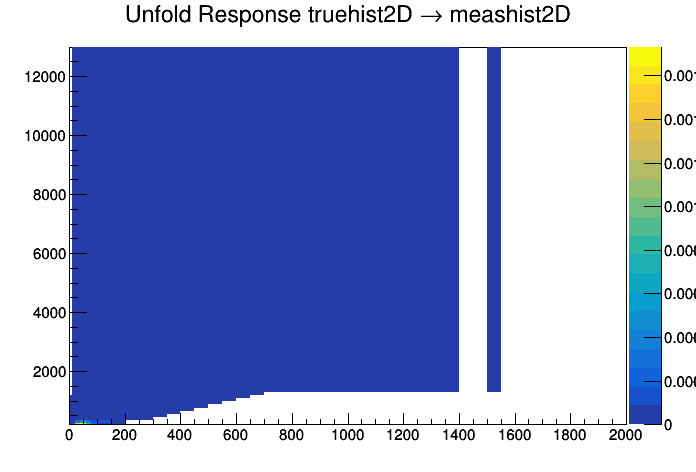

In [7]:
c2 = ROOT.TCanvas("c2", "c2")
unfolded_pdfup.Draw("colz")
c2.Draw()

printit(unfolded_pdfup)

  -43 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 
    0 0.00e+00 0.00e+00 3.54e-10 4.01e-10 7.74e-11 8.89e-12 0.00e+00 0.00e+00 1.76e-11 0.00e+00 0.00e+00 0.00e+00 
    1 0.00e+00 3.60e-08 1.76e-08 9.18e-10 3.05e-10 5.77e-11 0.00e+00 2.26e-11 0.00e+00 0.00e+00 0.00e+00 1.69e-12 
    5 0.00e+00 1.62e-06 2.19e-07 1.96e-08 1.58e-09 5.94e-10 1.02e-10 1.64e-11 1.04e-11 6.86e-12 3.39e-13 0.00e+00 
   10 0.00e+00 8.73e-05 1.24e-05 1.19e-06 1.10e-07 2.45e-08 5.30e-09 1.38e-09 2.67e-10 1.45e-10 1.25e-11 1.42e-11 
   20 0.00e+00 1.38e-03 2.58e-04 3.23e-05 3.82e-06 9.65e-07 2.57e-07 7.50e-08 1.39e-08 5.40e-09 2.12e-09 8.43e-10 
   40 0.00e+00 1.73e-03 4.83e-04 8.47e-05 1.24e-05 3.56e-06 1.06e-06 3.47e-07 7.26e-08 2.92e-08 1.23e-08 5.51e-09 
   60 0.00e+00 7.63e-04 2.96e-04 7.47e-05 1.43e-05 4.82e-06 1.63e-06 5.97e-07 1.36e-07 5.90e-08 2.66e-08 1.23e-08 
   80 0.00e+00 2.83e-04 1.48e-04 4.41e-05 9.98e-06 3.83e-06 1.46e-06 6.02e-07 1.

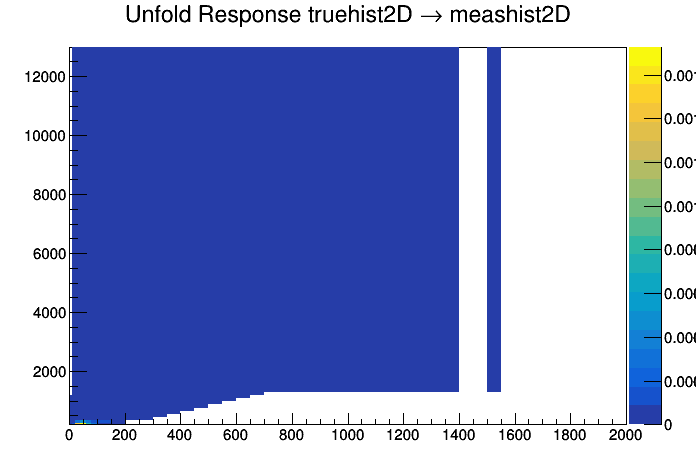

In [8]:
c3 = ROOT.TCanvas("c3", "c3")
unfolded_pdfdn.Draw("colz")
c3.Draw()

printit(unfolded_pdfdn)